In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

#### Import data

In [8]:
data_raw = pd.read_csv('data_raw.csv', sep=';')
data_raw.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### View predictor variables

In [9]:
#check dimensions
data_raw.shape

(4424, 37)

In [10]:
#check variable types
data_raw.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [11]:
#count missing values
data_raw.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nationality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [12]:
#check that each variable has only appropriate values
for var in data_raw.columns:
    print(f'{var}: {data_raw[var].unique()}')


Marital status: [1 2 4 3 5 6]
Application mode: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application order: [5 1 2 4 3 6 9 0]
Course: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime/evening attendance: [1 0]
Previous qualification: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous qualification (grade): [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nationality

#### View target variable

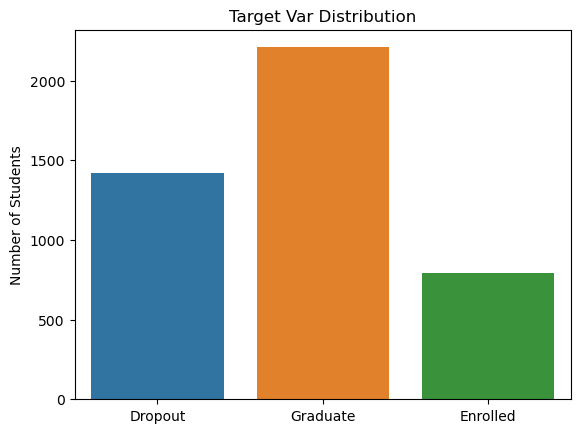

In [13]:
sns.countplot(x=data_raw['Target'], data=data_raw)

plt.title('Target Var Distribution')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

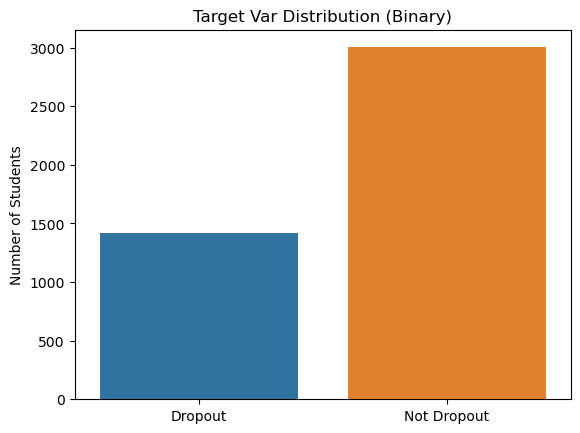

In [14]:
data_binary = copy.deepcopy(data_raw)
data_binary['Target'] = data_binary['Target'].map({'Dropout':'Dropout', 'Graduate':'Not Dropout', 'Enrolled':'Not Dropout'})

sns.countplot(x=data_binary['Target'], data=data_binary)

plt.title('Target Var Distribution (Binary)')
plt.xlabel('')
plt.ylabel('Number of Students')
plt.show()

Save dataset with binary target variable

In [15]:
data_binary['Target'] = data_binary['Target'].map({'Dropout':1, 'Not Dropout':0})
data_binary.to_csv('data_clean.csv', index=False)